In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

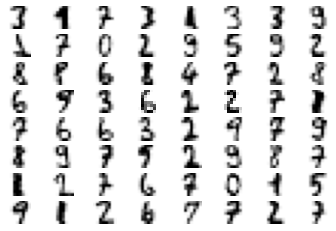

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

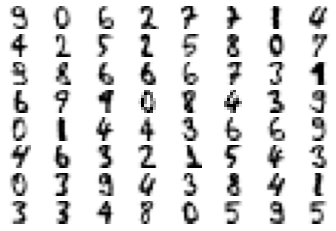

In [6]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, samplesize)]).reshape(8,8), cmap='Greys')
plt.show()

In [7]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 3000)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist10")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.10192 stdev: 0.03698
Best fitness: 0.25170 - size: (10, 64) - species 10 - id 88
Average adjusted fitness: 0.086
Mean genetic distance 2.822, standard deviation 0.311
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 53.939 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.11891 stdev: 0.03680
Best fitness: 0.25170 - size: (10, 64) - species 10 - id 88
Average adjusted fitness: 0.094
Mean genetic distance 2.930, standard deviation 0.343
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 58.008 sec (55.973 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.12305 stdev: 0.03948
Best fitness: 0.25170 - size: (10, 64) - species 10 - id 88
Average adjusted fitness: 0.089
Mean genetic distance 2.938, standard deviation 0.346
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 61.732 sec (5

Population's average fitness: 0.16601 stdev: 0.05517
Best fitness: 0.29004 - size: (14, 68) - species 16 - id 2854
Average adjusted fitness: 0.132
Mean genetic distance 3.140, standard deviation 0.410
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 66.452 sec (64.551 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.16885 stdev: 0.05376
Best fitness: 0.29004 - size: (14, 68) - species 16 - id 2854
Average adjusted fitness: 0.137
Mean genetic distance 3.154, standard deviation 0.412
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 63.487 sec (64.705 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.17060 stdev: 0.05514
Best fitness: 0.29004 - size: (14, 68) - species 16 - id 2854
Average adjusted fitness: 0.134
Mean genetic distance 3.146, standard deviation 0.415
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 65.157 sec (64.841 average)

Population's average fitness: 0.17728 stdev: 0.05940
Best fitness: 0.30736 - size: (17, 68) - species 13 - id 6403
Average adjusted fitness: 0.127
Mean genetic distance 3.174, standard deviation 0.510
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 67.020 sec (67.237 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.17493 stdev: 0.06044
Best fitness: 0.31231 - size: (15, 67) - species 8 - id 6770
Average adjusted fitness: 0.126
Mean genetic distance 3.186, standard deviation 0.508
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 70.584 sec (67.421 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.17966 stdev: 0.05929
Best fitness: 0.31231 - size: (15, 67) - species 8 - id 6770
Average adjusted fitness: 0.109
Mean genetic distance 3.181, standard deviation 0.542
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 66.336 sec (67.123 average)



Population's average fitness: 0.18459 stdev: 0.06121
Best fitness: 0.32900 - size: (17, 70) - species 43 - id 8122
Average adjusted fitness: 0.135
Mean genetic distance 3.231, standard deviation 0.554
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 71.951 sec (71.243 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.19255 stdev: 0.06086
Best fitness: 0.32900 - size: (17, 70) - species 43 - id 8122
Average adjusted fitness: 0.157
Mean genetic distance 3.205, standard deviation 0.562
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 71.650 sec (71.299 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.19162 stdev: 0.06231
Best fitness: 0.32900 - size: (17, 70) - species 43 - id 8122
Average adjusted fitness: 0.130
Mean genetic distance 3.234, standard deviation 0.559
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 70.932 sec (71.104 average)

Population's average fitness: 0.19104 stdev: 0.06602
Best fitness: 0.32900 - size: (17, 70) - species 43 - id 8122
Average adjusted fitness: 0.174
Mean genetic distance 3.015, standard deviation 0.618
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 76.783 sec (74.397 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.18144 stdev: 0.06150
Best fitness: 0.32900 - size: (17, 70) - species 43 - id 8122
Average adjusted fitness: 0.115
Mean genetic distance 3.024, standard deviation 0.623
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 78.329 sec (75.179 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.17091 stdev: 0.06593
Best fitness: 0.32900 - size: (17, 70) - species 43 - id 8122
Average adjusted fitness: 0.120
Mean genetic distance 3.011, standard deviation 0.635
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 75.677 sec (75.103 average)

 

Population's average fitness: 0.21467 stdev: 0.06046
Best fitness: 0.37662 - size: (17, 76) - species 58 - id 18292
Average adjusted fitness: 0.161
Mean genetic distance 2.914, standard deviation 0.570
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 75.369 sec (76.162 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.20643 stdev: 0.06436
Best fitness: 0.37662 - size: (17, 76) - species 58 - id 18292
Average adjusted fitness: 0.135
Mean genetic distance 2.964, standard deviation 0.559
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 78.093 sec (76.489 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.20543 stdev: 0.06414
Best fitness: 0.37662 - size: (17, 76) - species 58 - id 18292
Average adjusted fitness: 0.136
Mean genetic distance 2.953, standard deviation 0.569
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 75.760 sec (76.007 ave

Population's average fitness: 0.19288 stdev: 0.06293
Best fitness: 0.37662 - size: (17, 76) - species 58 - id 18292
Average adjusted fitness: 0.165
Mean genetic distance 2.914, standard deviation 0.506
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 79.935 sec (80.952 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.18956 stdev: 0.06419
Best fitness: 0.37662 - size: (17, 76) - species 58 - id 18292
Average adjusted fitness: 0.155
Mean genetic distance 2.905, standard deviation 0.526
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 80.544 sec (81.252 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.19528 stdev: 0.06255
Best fitness: 0.37662 - size: (17, 76) - species 58 - id 18292
Average adjusted fitness: 0.123
Mean genetic distance 2.934, standard deviation 0.525
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 82.744 sec (81.331 ave

Population's average fitness: 0.19051 stdev: 0.06935
Best fitness: 0.37786 - size: (22, 83) - species 81 - id 24443
Average adjusted fitness: 0.168
Mean genetic distance 3.030, standard deviation 0.574
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 82.424 sec (83.299 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.19801 stdev: 0.06893
Best fitness: 0.37786 - size: (22, 83) - species 81 - id 24443
Average adjusted fitness: 0.142
Mean genetic distance 3.043, standard deviation 0.561
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 84.375 sec (83.420 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.19787 stdev: 0.06698
Best fitness: 0.37786 - size: (22, 83) - species 81 - id 24443
Average adjusted fitness: 0.167
Mean genetic distance 3.031, standard deviation 0.570
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 84.646 sec (83.288 ave

Population's average fitness: 0.18845 stdev: 0.06828
Best fitness: 0.37786 - size: (22, 83) - species 81 - id 24443
Average adjusted fitness: 0.144
Mean genetic distance 2.871, standard deviation 0.588
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 86.136 sec (85.342 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.18791 stdev: 0.06833
Best fitness: 0.37786 - size: (22, 83) - species 81 - id 24443
Average adjusted fitness: 0.155
Mean genetic distance 2.893, standard deviation 0.570
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 89.742 sec (85.828 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.17964 stdev: 0.07051
Best fitness: 0.37786 - size: (22, 83) - species 81 - id 24443
Average adjusted fitness: 0.145
Mean genetic distance 2.946, standard deviation 0.617
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 87.488 sec (86.210 avera

Population's average fitness: 0.17021 stdev: 0.06343
Best fitness: 0.37786 - size: (22, 83) - species 81 - id 24443
Average adjusted fitness: 0.102
Mean genetic distance 2.651, standard deviation 0.425
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 86.890 sec (88.465 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.17839 stdev: 0.07117
Best fitness: 0.37786 - size: (22, 83) - species 81 - id 24443
Average adjusted fitness: 0.125
Mean genetic distance 2.664, standard deviation 0.420
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 89.106 sec (88.333 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.17881 stdev: 0.06701
Best fitness: 0.37786 - size: (22, 83) - species 81 - id 24443
Average adjusted fitness: 0.124
Mean genetic distance 2.659, standard deviation 0.422
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 87.913 sec (88.372 averag

Population's average fitness: 0.18182 stdev: 0.06974
Best fitness: 0.37786 - size: (22, 83) - species 81 - id 24443
Average adjusted fitness: 0.144
Mean genetic distance 2.717, standard deviation 0.432
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 92.393 sec (91.709 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.17895 stdev: 0.07029
Best fitness: 0.37786 - size: (22, 83) - species 81 - id 24443
Average adjusted fitness: 0.143
Mean genetic distance 2.718, standard deviation 0.450
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 90.458 sec (91.833 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.17995 stdev: 0.06885
Best fitness: 0.37786 - size: (22, 83) - species 81 - id 24443
Average adjusted fitness: 0.132
Mean genetic distance 2.692, standard deviation 0.440
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 91.657 sec (91.822 ave

Population's average fitness: 0.17904 stdev: 0.06681
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.145
Mean genetic distance 2.690, standard deviation 0.425
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 80.017 sec (86.283 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.17905 stdev: 0.06173
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.118
Mean genetic distance 2.692, standard deviation 0.423
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 80.689 sec (85.762 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.17905 stdev: 0.06553
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.153
Mean genetic distance 2.688, standard deviation 0.409
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 81.309 sec (85.212 ave

Population's average fitness: 0.19449 stdev: 0.07108
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.153
Mean genetic distance 2.779, standard deviation 0.454
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 67.590 sec (67.876 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.19761 stdev: 0.06786
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.167
Mean genetic distance 2.747, standard deviation 0.485
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 66.445 sec (67.890 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.19708 stdev: 0.07220
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.143
Mean genetic distance 2.765, standard deviation 0.477
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 69.315 sec (68.324 ave

Population's average fitness: 0.19813 stdev: 0.06912
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.158
Mean genetic distance 2.646, standard deviation 0.467
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 60.784 sec (72.054 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.19664 stdev: 0.06597
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.152
Mean genetic distance 2.606, standard deviation 0.470
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 61.297 sec (71.028 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.19194 stdev: 0.06631
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.134
Mean genetic distance 2.615, standard deviation 0.461
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 59.902 sec (69.573 averag

Population's average fitness: 0.18129 stdev: 0.07163
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.142
Mean genetic distance 2.514, standard deviation 0.384
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 60.014 sec (61.210 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.18240 stdev: 0.06920
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.124
Mean genetic distance 2.519, standard deviation 0.377
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 59.933 sec (60.961 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.18455 stdev: 0.07303
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.137
Mean genetic distance 2.562, standard deviation 0.317
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 64.011 sec (61.439 averag

Population's average fitness: 0.18866 stdev: 0.07320
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.168
Mean genetic distance 2.609, standard deviation 0.392
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 60.871 sec (61.230 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.18452 stdev: 0.07318
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.156
Mean genetic distance 2.601, standard deviation 0.404
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 60.366 sec (61.138 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.18603 stdev: 0.06720
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.111
Mean genetic distance 2.585, standard deviation 0.419
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 62.210 sec (61.090 aver

Population's average fitness: 0.19021 stdev: 0.06876
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.128
Mean genetic distance 2.637, standard deviation 0.422
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 61.073 sec (60.396 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.18159 stdev: 0.07661
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.171
Mean genetic distance 2.644, standard deviation 0.417
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 60.574 sec (60.590 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.19086 stdev: 0.07375
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.146
Mean genetic distance 2.638, standard deviation 0.424
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 60.104 sec (60.720 ave

Population's average fitness: 0.19451 stdev: 0.06890
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.121
Mean genetic distance 2.583, standard deviation 0.439
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 46.215 sec (46.519 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.19425 stdev: 0.07334
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.171
Mean genetic distance 2.611, standard deviation 0.427
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 47.224 sec (45.844 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.19395 stdev: 0.07681
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.163
Mean genetic distance 2.616, standard deviation 0.461
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 45.150 sec (45.745 averag

Population's average fitness: 0.17814 stdev: 0.07739
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.140
Mean genetic distance 2.589, standard deviation 0.379
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 46.536 sec (46.542 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.18186 stdev: 0.07181
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.147
Mean genetic distance 2.593, standard deviation 0.401
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 45.993 sec (46.707 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.17502 stdev: 0.07162
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.142
Mean genetic distance 2.530, standard deviation 0.440
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 48.559 sec (47.061 averag

Population's average fitness: 0.18134 stdev: 0.06757
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.144
Mean genetic distance 2.743, standard deviation 0.441
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 43.970 sec (45.090 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.18510 stdev: 0.06927
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.134
Mean genetic distance 2.748, standard deviation 0.432
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 45.367 sec (45.165 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.18265 stdev: 0.07131
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.151
Mean genetic distance 2.769, standard deviation 0.414
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 44.735 sec (45.151 ave

Population's average fitness: 0.18007 stdev: 0.07243
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.161
Mean genetic distance 2.604, standard deviation 0.485
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 42.716 sec (40.553 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.17117 stdev: 0.07314
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.137
Mean genetic distance 2.596, standard deviation 0.482
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 37.287 sec (40.277 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.18066 stdev: 0.07672
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.166
Mean genetic distance 2.619, standard deviation 0.467
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 38.244 sec (40.130 averag

Population's average fitness: 0.18743 stdev: 0.07466
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.125
Mean genetic distance 2.570, standard deviation 0.372
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 46.050 sec (39.726 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.18191 stdev: 0.07923
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.168
Mean genetic distance 2.583, standard deviation 0.362
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 48.189 sec (40.777 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.18747 stdev: 0.07905
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.170
Mean genetic distance 2.571, standard deviation 0.405
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 51.798 sec (42.177 averag

Population's average fitness: 0.20071 stdev: 0.07558
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.180
Mean genetic distance 2.618, standard deviation 0.409
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 44.774 sec (46.426 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.19317 stdev: 0.07913
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.138
Mean genetic distance 2.615, standard deviation 0.407
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 45.516 sec (46.285 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.20191 stdev: 0.07962
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.157
Mean genetic distance 2.593, standard deviation 0.418
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 50.381 sec (46.746 aver

Population's average fitness: 0.19148 stdev: 0.07134
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.129
Mean genetic distance 2.572, standard deviation 0.389
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 41.887 sec (43.715 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.20644 stdev: 0.07132
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.161
Mean genetic distance 2.550, standard deviation 0.394
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 43.785 sec (43.589 average)

 ****** Running generation 554 ****** 

Population's average fitness: 0.18818 stdev: 0.07634
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.166
Mean genetic distance 2.562, standard deviation 0.399
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 42.256 sec (43.480 averag

Population's average fitness: 0.19679 stdev: 0.07442
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.125
Mean genetic distance 2.609, standard deviation 0.469
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 45.117 sec (43.375 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.19317 stdev: 0.06984
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.136
Mean genetic distance 2.613, standard deviation 0.455
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 42.668 sec (43.291 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.19725 stdev: 0.07285
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.129
Mean genetic distance 2.631, standard deviation 0.460
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 43.561 sec (43.636 averag

Population's average fitness: 0.20577 stdev: 0.07406
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.175
Mean genetic distance 2.655, standard deviation 0.431
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 44.226 sec (43.098 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.20511 stdev: 0.07767
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.162
Mean genetic distance 2.645, standard deviation 0.415
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 43.501 sec (43.009 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.21200 stdev: 0.07968
Best fitness: 0.38219 - size: (17, 77) - species 58 - id 41690
Average adjusted fitness: 0.144
Mean genetic distance 2.651, standard deviation 0.424
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 44.309 sec (43.221 ave

Population's average fitness: 0.20272 stdev: 0.07323
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.140
Mean genetic distance 2.568, standard deviation 0.364
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 43.265 sec (44.315 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.19726 stdev: 0.07748
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.182
Mean genetic distance 2.559, standard deviation 0.341
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 43.743 sec (44.469 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.19252 stdev: 0.07978
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.176
Mean genetic distance 2.556, standard deviation 0.363
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 43.156 sec (44.1

Mean genetic distance 2.606, standard deviation 0.350
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 45.047 sec (45.557 average)

 ****** Running generation 648 ****** 

Population's average fitness: 0.19896 stdev: 0.08138
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.174
Mean genetic distance 2.603, standard deviation 0.395
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 45.019 sec (45.659 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.20251 stdev: 0.07709
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.178
Mean genetic distance 2.596, standard deviation 0.380
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 46.649 sec (45.686 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.19422 stdev: 0.07694
Best fitness: 0.39270 - size: (30, 89) - spe

Population's average fitness: 0.17968 stdev: 0.07941
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.156
Mean genetic distance 2.644, standard deviation 0.432
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 43.733 sec (46.025 average)

 ****** Running generation 672 ****** 

Population's average fitness: 0.19023 stdev: 0.07635
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.151
Mean genetic distance 2.622, standard deviation 0.449
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 45.381 sec (45.987 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.18917 stdev: 0.07961
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.155
Mean genetic distance 2.656, standard deviation 0.420
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 45.050 sec (45.950 

Mean genetic distance 2.437, standard deviation 0.341
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 46.644 sec (46.456 average)

 ****** Running generation 695 ****** 

Population's average fitness: 0.17743 stdev: 0.07452
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.154
Mean genetic distance 2.422, standard deviation 0.356
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 52.512 sec (47.102 average)

 ****** Running generation 696 ****** 

Population's average fitness: 0.17912 stdev: 0.07915
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.172
Mean genetic distance 2.409, standard deviation 0.337
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 48.594 sec (47.327 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.18435 stdev: 0.07652
Best fitness: 0.39270 - size: (30, 89) - specie

Population's average fitness: 0.18159 stdev: 0.06871
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.153
Mean genetic distance 2.673, standard deviation 0.393
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 47.031 sec (50.014 average)

 ****** Running generation 719 ****** 

Population's average fitness: 0.18087 stdev: 0.06673
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.135
Mean genetic distance 2.664, standard deviation 0.387
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 52.860 sec (50.376 average)

 ****** Running generation 720 ****** 

Population's average fitness: 0.18266 stdev: 0.07156
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.155
Mean genetic distance 2.679, standard deviation 0.390
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 51.530 sec (50.6

Mean genetic distance 2.749, standard deviation 0.442
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 47.514 sec (49.201 average)

 ****** Running generation 742 ****** 

Population's average fitness: 0.21047 stdev: 0.07327
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.125
Mean genetic distance 2.753, standard deviation 0.438
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 49.160 sec (49.099 average)

 ****** Running generation 743 ****** 

Population's average fitness: 0.20747 stdev: 0.07281
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.147
Mean genetic distance 2.743, standard deviation 0.442
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 51.688 sec (49.275 average)

 ****** Running generation 744 ****** 

Population's average fitness: 0.20739 stdev: 0.07097
Best fitness: 0.39270 - size: (30, 89) - spe

Population's average fitness: 0.18734 stdev: 0.06759
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.126
Mean genetic distance 2.549, standard deviation 0.433
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 48.115 sec (49.166 average)

 ****** Running generation 766 ****** 

Population's average fitness: 0.18067 stdev: 0.07173
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.142
Mean genetic distance 2.465, standard deviation 0.457
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 47.070 sec (48.919 average)

 ****** Running generation 767 ****** 

Population's average fitness: 0.17330 stdev: 0.06805
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.145
Mean genetic distance 2.476, standard deviation 0.436
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 48.884 sec (48.617 

Mean genetic distance 2.582, standard deviation 0.365
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 48.047 sec (47.410 average)

 ****** Running generation 789 ****** 

Population's average fitness: 0.19818 stdev: 0.07543
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.153
Mean genetic distance 2.598, standard deviation 0.377
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 49.133 sec (47.668 average)

 ****** Running generation 790 ****** 

Population's average fitness: 0.19086 stdev: 0.07809
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.153
Mean genetic distance 2.604, standard deviation 0.395
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 47.790 sec (47.717 average)

 ****** Running generation 791 ****** 

Population's average fitness: 0.19485 stdev: 0.07142
Best fitness: 0.39270 - size: (30, 89) - spe

Population's average fitness: 0.18815 stdev: 0.07458
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.147
Mean genetic distance 2.646, standard deviation 0.432
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 47.422 sec (47.967 average)

 ****** Running generation 813 ****** 

Population's average fitness: 0.18465 stdev: 0.07666
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.168
Mean genetic distance 2.642, standard deviation 0.433
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 48.421 sec (48.086 average)

 ****** Running generation 814 ****** 

Population's average fitness: 0.18705 stdev: 0.07615
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.152
Mean genetic distance 2.654, standard deviation 0.434
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 49.526 sec (48.2

Mean genetic distance 2.661, standard deviation 0.398
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 48.567 sec (48.312 average)

 ****** Running generation 836 ****** 

Population's average fitness: 0.18676 stdev: 0.07530
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.150
Mean genetic distance 2.664, standard deviation 0.400
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 49.768 sec (48.569 average)

 ****** Running generation 837 ****** 

Population's average fitness: 0.18346 stdev: 0.07383
Best fitness: 0.39270 - size: (30, 89) - species 140 - id 110569
Average adjusted fitness: 0.155
Mean genetic distance 2.656, standard deviation 0.423
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 50.702 sec (48.660 average)

 ****** Running generation 838 ****** 

Population's average fitness: 0.19290 stdev: 0.07170
Best fitness: 0.39270 - size: (30, 89) - speci

Population's average fitness: 0.18064 stdev: 0.07081
Best fitness: 0.39889 - size: (44, 107) - species 228 - id 150059
Average adjusted fitness: 0.137
Mean genetic distance 2.692, standard deviation 0.386
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 52.865 sec (49.462 average)

 ****** Running generation 860 ****** 

Population's average fitness: 0.18811 stdev: 0.06791
Best fitness: 0.39889 - size: (44, 107) - species 228 - id 150059
Average adjusted fitness: 0.141
Mean genetic distance 2.679, standard deviation 0.402
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 47.921 sec (49.453 average)

 ****** Running generation 861 ****** 

Population's average fitness: 0.19873 stdev: 0.06674
Best fitness: 0.39889 - size: (44, 107) - species 228 - id 150059
Average adjusted fitness: 0.121
Mean genetic distance 2.702, standard deviation 0.399
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 48.389 sec (49

Mean genetic distance 2.718, standard deviation 0.465
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 51.881 sec (52.110 average)

 ****** Running generation 883 ****** 

Population's average fitness: 0.18891 stdev: 0.07520
Best fitness: 0.39889 - size: (44, 107) - species 228 - id 150059
Average adjusted fitness: 0.155
Mean genetic distance 2.726, standard deviation 0.456
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 50.759 sec (51.992 average)

 ****** Running generation 884 ****** 

Population's average fitness: 0.19056 stdev: 0.07336
Best fitness: 0.39889 - size: (44, 107) - species 228 - id 150059
Average adjusted fitness: 0.171
Mean genetic distance 2.713, standard deviation 0.457
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 52.139 sec (51.805 average)

 ****** Running generation 885 ****** 

Population's average fitness: 0.18609 stdev: 0.07285
Best fitness: 0.39889 - size: (44, 107) - 

Population's average fitness: 0.19675 stdev: 0.07107
Best fitness: 0.42115 - size: (46, 113) - species 228 - id 161444
Average adjusted fitness: 0.124
Mean genetic distance 2.740, standard deviation 0.497
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 52.556 sec (51.146 average)

 ****** Running generation 907 ****** 

Population's average fitness: 0.19022 stdev: 0.07167
Best fitness: 0.42115 - size: (46, 113) - species 228 - id 161444
Average adjusted fitness: 0.135
Mean genetic distance 2.721, standard deviation 0.505
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 51.600 sec (51.095 average)

 ****** Running generation 908 ****** 

Population's average fitness: 0.19176 stdev: 0.07758
Best fitness: 0.42115 - size: (46, 113) - species 228 - id 161444
Average adjusted fitness: 0.152
Mean genetic distance 2.715, standard deviation 0.526
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 51.327 sec (51.1

Mean genetic distance 2.670, standard deviation 0.564
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 52.512 sec (54.350 average)

 ****** Running generation 930 ****** 

Population's average fitness: 0.18133 stdev: 0.07134
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.145
Mean genetic distance 2.735, standard deviation 0.500
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 55.139 sec (54.539 average)

 ****** Running generation 931 ****** 

Population's average fitness: 0.19382 stdev: 0.07041
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.151
Mean genetic distance 2.744, standard deviation 0.486
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 52.301 sec (54.229 average)

 ****** Running generation 932 ****** 

Population's average fitness: 0.18838 stdev: 0.07762
Best fitness: 0.43166 - size: (46, 115) - spe

Population's average fitness: 0.18094 stdev: 0.08059
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.150
Mean genetic distance 2.694, standard deviation 0.496
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 58.054 sec (53.064 average)

 ****** Running generation 954 ****** 

Population's average fitness: 0.18087 stdev: 0.07440
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.126
Mean genetic distance 2.698, standard deviation 0.497
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 52.256 sec (53.296 average)

 ****** Running generation 955 ****** 

Population's average fitness: 0.17789 stdev: 0.07389
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.137
Mean genetic distance 2.658, standard deviation 0.480
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 52.584 sec (53.1

Mean genetic distance 2.834, standard deviation 0.458
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 52.660 sec (53.476 average)

 ****** Running generation 977 ****** 

Population's average fitness: 0.19853 stdev: 0.07924
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.161
Mean genetic distance 2.829, standard deviation 0.463
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 52.231 sec (53.545 average)

 ****** Running generation 978 ****** 

Population's average fitness: 0.19505 stdev: 0.07569
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.143
Mean genetic distance 2.803, standard deviation 0.512
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 50.734 sec (53.400 average)

 ****** Running generation 979 ****** 

Population's average fitness: 0.19299 stdev: 0.07087
Best fitness: 0.43166 - size: (46, 115) - s

Population's average fitness: 0.19232 stdev: 0.07036
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.160
Mean genetic distance 2.687, standard deviation 0.461
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 52.674 sec (54.565 average)

 ****** Running generation 1001 ****** 

Population's average fitness: 0.19017 stdev: 0.06849
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.157
Mean genetic distance 2.691, standard deviation 0.481
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 54.568 sec (54.609 average)

 ****** Running generation 1002 ****** 

Population's average fitness: 0.19297 stdev: 0.07270
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.162
Mean genetic distance 2.699, standard deviation 0.464
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 52.931 sec (54

Mean genetic distance 2.797, standard deviation 0.568
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 54.475 sec (44.861 average)

 ****** Running generation 1024 ****** 

Population's average fitness: 0.19622 stdev: 0.07249
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.126
Mean genetic distance 2.810, standard deviation 0.563
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 52.481 sec (45.705 average)

 ****** Running generation 1025 ****** 

Population's average fitness: 0.20640 stdev: 0.07253
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.172
Mean genetic distance 2.799, standard deviation 0.554
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 53.925 sec (46.865 average)

 ****** Running generation 1026 ****** 

Population's average fitness: 0.21280 stdev: 0.07160
Best fitness: 0.43166 - size: (46, 115) - 

Population's average fitness: 0.18840 stdev: 0.07150
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.128
Mean genetic distance 2.752, standard deviation 0.548
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 53.978 sec (54.435 average)

 ****** Running generation 1048 ****** 

Population's average fitness: 0.19555 stdev: 0.07047
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.135
Mean genetic distance 2.767, standard deviation 0.545
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 55.219 sec (54.623 average)

 ****** Running generation 1049 ****** 

Population's average fitness: 0.19485 stdev: 0.07125
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.113
Mean genetic distance 2.809, standard deviation 0.555
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 54.589 sec (54

Mean genetic distance 2.852, standard deviation 0.539
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 55.794 sec (56.093 average)

 ****** Running generation 1071 ****** 

Population's average fitness: 0.19738 stdev: 0.07756
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.156
Mean genetic distance 2.850, standard deviation 0.537
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 54.001 sec (55.819 average)

 ****** Running generation 1072 ****** 

Population's average fitness: 0.20230 stdev: 0.07196
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.131
Mean genetic distance 2.836, standard deviation 0.543
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 61.351 sec (56.194 average)

 ****** Running generation 1073 ****** 

Population's average fitness: 0.19188 stdev: 0.07612
Best fitness: 0.43166 - size: (46, 115) - 

Population's average fitness: 0.19323 stdev: 0.07560
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.167
Mean genetic distance 2.816, standard deviation 0.549
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 60.665 sec (56.679 average)

 ****** Running generation 1095 ****** 

Population's average fitness: 0.19175 stdev: 0.07301
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.157
Mean genetic distance 2.813, standard deviation 0.529
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 59.095 sec (56.921 average)

 ****** Running generation 1096 ****** 

Population's average fitness: 0.19126 stdev: 0.07403
Best fitness: 0.43166 - size: (46, 115) - species 228 - id 162913
Average adjusted fitness: 0.172
Mean genetic distance 2.777, standard deviation 0.538
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 55.376 sec (56

Mean genetic distance 2.837, standard deviation 0.514
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 56.391 sec (56.840 average)

 ****** Running generation 1118 ****** 

Population's average fitness: 0.19624 stdev: 0.07712
Best fitness: 0.45702 - size: (46, 110) - species 228 - id 199926
Average adjusted fitness: 0.135
Mean genetic distance 2.821, standard deviation 0.541
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 54.677 sec (56.578 average)

 ****** Running generation 1119 ****** 

Population's average fitness: 0.19552 stdev: 0.07305
Best fitness: 0.45702 - size: (46, 110) - species 228 - id 199926
Average adjusted fitness: 0.171
Mean genetic distance 2.820, standard deviation 0.532
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 55.301 sec (56.265 average)

 ****** Running generation 1120 ****** 

Population's average fitness: 0.19890 stdev: 0.07601
Best fitness: 0.45702 - size: (46, 110) - 

Population's average fitness: 0.20207 stdev: 0.07790
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.184
Mean genetic distance 2.797, standard deviation 0.483
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 51.892 sec (52.979 average)

 ****** Running generation 1142 ****** 

Population's average fitness: 0.19657 stdev: 0.08242
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.166
Mean genetic distance 2.790, standard deviation 0.509
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 55.130 sec (53.259 average)

 ****** Running generation 1143 ****** 

Population's average fitness: 0.20018 stdev: 0.07679
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.153
Mean genetic distance 2.798, standard deviation 0.497
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 61.881 sec 

Mean genetic distance 2.824, standard deviation 0.533
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 60.631 sec (61.510 average)

 ****** Running generation 1165 ****** 

Population's average fitness: 0.20669 stdev: 0.07819
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.152
Mean genetic distance 2.859, standard deviation 0.500
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 60.902 sec (61.500 average)

 ****** Running generation 1166 ****** 

Population's average fitness: 0.19771 stdev: 0.07911
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.142
Mean genetic distance 2.868, standard deviation 0.479
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 60.322 sec (61.583 average)

 ****** Running generation 1167 ****** 

Population's average fitness: 0.20073 stdev: 0.07791
Best fitness: 0.45702 - size: (46, 110) -

Population's average fitness: 0.20307 stdev: 0.08055
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.132
Mean genetic distance 2.876, standard deviation 0.519
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 60.530 sec (60.413 average)

 ****** Running generation 1189 ****** 

Population's average fitness: 0.19872 stdev: 0.07759
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.147
Mean genetic distance 2.862, standard deviation 0.496
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 60.454 sec (60.349 average)

 ****** Running generation 1190 ****** 

Population's average fitness: 0.20770 stdev: 0.07785
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.164
Mean genetic distance 2.866, standard deviation 0.490
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 61.119 sec 

Mean genetic distance 2.855, standard deviation 0.512
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 63.196 sec (62.917 average)

 ****** Running generation 1212 ****** 

Population's average fitness: 0.20249 stdev: 0.08331
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.180
Mean genetic distance 2.863, standard deviation 0.519
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 64.193 sec (63.035 average)

 ****** Running generation 1213 ****** 

Population's average fitness: 0.20059 stdev: 0.08234
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.139
Mean genetic distance 2.868, standard deviation 0.521
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 63.746 sec (63.162 average)

 ****** Running generation 1214 ****** 

Population's average fitness: 0.20007 stdev: 0.08067
Best fitness: 0.45702 - size: (46, 110) 

Population's average fitness: 0.19550 stdev: 0.08004
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.159
Mean genetic distance 2.774, standard deviation 0.554
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 61.534 sec (63.979 average)

 ****** Running generation 1236 ****** 

Population's average fitness: 0.19089 stdev: 0.08553
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.155
Mean genetic distance 2.717, standard deviation 0.566
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 66.622 sec (64.071 average)

 ****** Running generation 1237 ****** 

Population's average fitness: 0.20371 stdev: 0.08672
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.149
Mean genetic distance 2.733, standard deviation 0.538
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 61.790 sec (63

Mean genetic distance 2.836, standard deviation 0.478
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 61.994 sec (63.443 average)

 ****** Running generation 1259 ****** 

Population's average fitness: 0.21423 stdev: 0.08326
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.147
Mean genetic distance 2.836, standard deviation 0.491
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 62.963 sec (63.464 average)

 ****** Running generation 1260 ****** 

Population's average fitness: 0.20675 stdev: 0.08639
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.172
Mean genetic distance 2.847, standard deviation 0.541
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 62.958 sec (63.604 average)

 ****** Running generation 1261 ****** 

Population's average fitness: 0.21815 stdev: 0.08164
Best fitness: 0.45702 - size: (46, 110) 

Population's average fitness: 0.22233 stdev: 0.08188
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.145
Mean genetic distance 2.675, standard deviation 0.514
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 65.745 sec (65.157 average)

 ****** Running generation 1283 ****** 

Population's average fitness: 0.21676 stdev: 0.08308
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.194
Mean genetic distance 2.691, standard deviation 0.492
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 65.156 sec (65.058 average)

 ****** Running generation 1284 ****** 

Population's average fitness: 0.21470 stdev: 0.08505
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.153
Mean genetic distance 2.712, standard deviation 0.473
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 67.160 sec (65

Mean genetic distance 2.743, standard deviation 0.504
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 64.943 sec (64.629 average)

 ****** Running generation 1306 ****** 

Population's average fitness: 0.20414 stdev: 0.08279
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.180
Mean genetic distance 2.752, standard deviation 0.482
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 64.647 sec (64.645 average)

 ****** Running generation 1307 ****** 

Population's average fitness: 0.20174 stdev: 0.08395
Best fitness: 0.45702 - size: (46, 110) - species 283 - id 199926
Average adjusted fitness: 0.158
Mean genetic distance 2.734, standard deviation 0.493
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 64.629 sec (64.831 average)

 ****** Running generation 1308 ****** 

Population's average fitness: 0.19808 stdev: 0.08905
Best fitness: 0.45702 - size: (46, 110) - 

Population's average fitness: 0.21180 stdev: 0.08079
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.165
Mean genetic distance 2.788, standard deviation 0.475
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 66.026 sec (67.272 average)

 ****** Running generation 1330 ****** 

Population's average fitness: 0.20907 stdev: 0.08254
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.207
Mean genetic distance 2.806, standard deviation 0.477
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 66.586 sec (67.129 average)

 ****** Running generation 1331 ****** 

Population's average fitness: 0.20048 stdev: 0.08234
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.124
Mean genetic distance 2.742, standard deviation 0.507
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 65.560 sec (

Mean genetic distance 2.801, standard deviation 0.454
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 47.499 sec (49.898 average)

 ****** Running generation 1353 ****** 

Population's average fitness: 0.21814 stdev: 0.08296
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.155
Mean genetic distance 2.793, standard deviation 0.452
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 50.084 sec (49.995 average)

 ****** Running generation 1354 ****** 

Population's average fitness: 0.21620 stdev: 0.08221
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.158
Mean genetic distance 2.798, standard deviation 0.447
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 48.963 sec (49.899 average)

 ****** Running generation 1355 ****** 

Population's average fitness: 0.21545 stdev: 0.08070
Best fitness: 0.45949 - size: (47, 115)

Population's average fitness: 0.20702 stdev: 0.07030
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.183
Mean genetic distance 2.886, standard deviation 0.556
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 56.806 sec (59.190 average)

 ****** Running generation 1377 ****** 

Population's average fitness: 0.21828 stdev: 0.07756
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.177
Mean genetic distance 2.877, standard deviation 0.578
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 57.664 sec (58.522 average)

 ****** Running generation 1378 ****** 

Population's average fitness: 0.20796 stdev: 0.08253
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.177
Mean genetic distance 2.904, standard deviation 0.572
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 54.323 sec (57

Mean genetic distance 2.885, standard deviation 0.520
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 58.970 sec (55.070 average)

 ****** Running generation 1400 ****** 

Population's average fitness: 0.21229 stdev: 0.07761
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.165
Mean genetic distance 2.891, standard deviation 0.539
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 57.295 sec (55.323 average)

 ****** Running generation 1401 ****** 

Population's average fitness: 0.21094 stdev: 0.08172
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.157
Mean genetic distance 2.876, standard deviation 0.527
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 57.493 sec (55.534 average)

 ****** Running generation 1402 ****** 

Population's average fitness: 0.22021 stdev: 0.07505
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20631 stdev: 0.08129
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.146
Mean genetic distance 2.823, standard deviation 0.511
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 60.105 sec (58.309 average)

 ****** Running generation 1424 ****** 

Population's average fitness: 0.19501 stdev: 0.08241
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.149
Mean genetic distance 2.873, standard deviation 0.525
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 59.775 sec (58.474 average)

 ****** Running generation 1425 ****** 

Population's average fitness: 0.20815 stdev: 0.08358
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.169
Mean genetic distance 2.843, standard deviation 0.538
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 59.298 sec (58

Mean genetic distance 2.791, standard deviation 0.645
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 63.995 sec (62.711 average)

 ****** Running generation 1447 ****** 

Population's average fitness: 0.20390 stdev: 0.08010
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.149
Mean genetic distance 2.790, standard deviation 0.637
Population of 202 members in 5 species
Total extinctions: 0
Generation time: 63.641 sec (63.071 average)

 ****** Running generation 1448 ****** 

Population's average fitness: 0.18899 stdev: 0.08561
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.153
Mean genetic distance 2.799, standard deviation 0.631
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 63.336 sec (63.149 average)

 ****** Running generation 1449 ****** 

Population's average fitness: 0.20655 stdev: 0.08513
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.19034 stdev: 0.08730
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.157
Mean genetic distance 2.861, standard deviation 0.462
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 65.825 sec (67.004 average)

 ****** Running generation 1471 ****** 

Population's average fitness: 0.20506 stdev: 0.08572
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.168
Mean genetic distance 2.859, standard deviation 0.452
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 65.899 sec (67.327 average)

 ****** Running generation 1472 ****** 

Population's average fitness: 0.20431 stdev: 0.08639
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.147
Mean genetic distance 2.856, standard deviation 0.492
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 66.549 sec 

Mean genetic distance 2.843, standard deviation 0.506
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 65.438 sec (66.664 average)

 ****** Running generation 1494 ****** 

Population's average fitness: 0.20352 stdev: 0.08688
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.130
Mean genetic distance 2.843, standard deviation 0.501
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 67.254 sec (66.951 average)

 ****** Running generation 1495 ****** 

Population's average fitness: 0.20103 stdev: 0.09143
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.153
Mean genetic distance 2.858, standard deviation 0.523
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 65.040 sec (66.405 average)

 ****** Running generation 1496 ****** 

Population's average fitness: 0.18944 stdev: 0.08874
Best fitness: 0.45949 - size: (47, 115)

Population's average fitness: 0.20208 stdev: 0.08528
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.158
Mean genetic distance 2.768, standard deviation 0.534
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 64.142 sec (63.892 average)

 ****** Running generation 1518 ****** 

Population's average fitness: 0.19684 stdev: 0.08250
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.154
Mean genetic distance 2.776, standard deviation 0.496
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 61.943 sec (63.139 average)

 ****** Running generation 1519 ****** 

Population's average fitness: 0.19309 stdev: 0.08315
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.140
Mean genetic distance 2.782, standard deviation 0.509
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 62.944 sec (63

Mean genetic distance 2.821, standard deviation 0.512
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 61.789 sec (63.899 average)

 ****** Running generation 1541 ****** 

Population's average fitness: 0.21537 stdev: 0.08489
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.155
Mean genetic distance 2.829, standard deviation 0.489
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 69.303 sec (64.100 average)

 ****** Running generation 1542 ****** 

Population's average fitness: 0.20970 stdev: 0.08833
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.167
Mean genetic distance 2.844, standard deviation 0.472
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 65.307 sec (64.099 average)

 ****** Running generation 1543 ****** 

Population's average fitness: 0.20526 stdev: 0.08664
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20481 stdev: 0.08564
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.149
Mean genetic distance 2.864, standard deviation 0.450
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 65.855 sec (66.836 average)

 ****** Running generation 1565 ****** 

Population's average fitness: 0.20712 stdev: 0.08425
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.141
Mean genetic distance 2.821, standard deviation 0.526
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 63.095 sec (66.238 average)

 ****** Running generation 1566 ****** 

Population's average fitness: 0.21826 stdev: 0.08288
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.174
Mean genetic distance 2.832, standard deviation 0.500
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 65.346 sec (66

Mean genetic distance 2.840, standard deviation 0.525
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 66.775 sec (66.669 average)

 ****** Running generation 1588 ****** 

Population's average fitness: 0.20449 stdev: 0.08547
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.180
Mean genetic distance 2.870, standard deviation 0.512
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 67.785 sec (66.473 average)

 ****** Running generation 1589 ****** 

Population's average fitness: 0.20976 stdev: 0.08919
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.177
Mean genetic distance 2.854, standard deviation 0.523
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 65.215 sec (66.007 average)

 ****** Running generation 1590 ****** 

Population's average fitness: 0.21086 stdev: 0.08732
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.21983 stdev: 0.08451
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.161
Mean genetic distance 2.809, standard deviation 0.579
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 64.967 sec (63.887 average)

 ****** Running generation 1612 ****** 

Population's average fitness: 0.20602 stdev: 0.07675
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.151
Mean genetic distance 2.810, standard deviation 0.592
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 61.528 sec (63.668 average)

 ****** Running generation 1613 ****** 

Population's average fitness: 0.20154 stdev: 0.07759
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.165
Mean genetic distance 2.831, standard deviation 0.535
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 64.442 sec (63

Mean genetic distance 2.756, standard deviation 0.507
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 66.736 sec (65.431 average)

 ****** Running generation 1635 ****** 

Population's average fitness: 0.20976 stdev: 0.08629
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.188
Mean genetic distance 2.756, standard deviation 0.495
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 64.962 sec (65.776 average)

 ****** Running generation 1636 ****** 

Population's average fitness: 0.20541 stdev: 0.08416
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.131
Mean genetic distance 2.780, standard deviation 0.503
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 67.068 sec (66.119 average)

 ****** Running generation 1637 ****** 

Population's average fitness: 0.20455 stdev: 0.08157
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20968 stdev: 0.08571
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.161
Mean genetic distance 2.703, standard deviation 0.485
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 63.005 sec (65.117 average)

 ****** Running generation 1659 ****** 

Population's average fitness: 0.20724 stdev: 0.08315
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.185
Mean genetic distance 2.722, standard deviation 0.463
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 62.613 sec (64.939 average)

 ****** Running generation 1660 ****** 

Population's average fitness: 0.21723 stdev: 0.08316
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.164
Mean genetic distance 2.721, standard deviation 0.472
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 64.218 sec (64

Mean genetic distance 2.722, standard deviation 0.491
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 65.130 sec (64.995 average)

 ****** Running generation 1682 ****** 

Population's average fitness: 0.21319 stdev: 0.07846
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.160
Mean genetic distance 2.720, standard deviation 0.500
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 66.976 sec (65.100 average)

 ****** Running generation 1683 ****** 

Population's average fitness: 0.21492 stdev: 0.08165
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.160
Mean genetic distance 2.727, standard deviation 0.496
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 66.220 sec (65.235 average)

 ****** Running generation 1684 ****** 

Population's average fitness: 0.21555 stdev: 0.08067
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20571 stdev: 0.08252
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.147
Mean genetic distance 2.744, standard deviation 0.561
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 68.118 sec (66.406 average)

 ****** Running generation 1706 ****** 

Population's average fitness: 0.20761 stdev: 0.08459
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.155
Mean genetic distance 2.740, standard deviation 0.540
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 71.694 sec (66.784 average)

 ****** Running generation 1707 ****** 

Population's average fitness: 0.20144 stdev: 0.08357
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.149
Mean genetic distance 2.749, standard deviation 0.530
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 65.721 sec (66

Mean genetic distance 2.775, standard deviation 0.480
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 64.439 sec (66.221 average)

 ****** Running generation 1729 ****** 

Population's average fitness: 0.21297 stdev: 0.08269
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.179
Mean genetic distance 2.787, standard deviation 0.476
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 64.817 sec (66.176 average)

 ****** Running generation 1730 ****** 

Population's average fitness: 0.19986 stdev: 0.08187
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.159
Mean genetic distance 2.793, standard deviation 0.482
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 65.826 sec (66.258 average)

 ****** Running generation 1731 ****** 

Population's average fitness: 0.20923 stdev: 0.07981
Best fitness: 0.45949 - size: (47, 115)

Population's average fitness: 0.21925 stdev: 0.08414
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.163
Mean genetic distance 2.664, standard deviation 0.391
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 63.332 sec (63.223 average)

 ****** Running generation 1753 ****** 

Population's average fitness: 0.21042 stdev: 0.08378
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.140
Mean genetic distance 2.647, standard deviation 0.393
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 67.028 sec (63.471 average)

 ****** Running generation 1754 ****** 

Population's average fitness: 0.21633 stdev: 0.08217
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.182
Mean genetic distance 2.669, standard deviation 0.392
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 65.626 sec 

Mean genetic distance 2.651, standard deviation 0.500
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 62.296 sec (63.418 average)

 ****** Running generation 1776 ****** 

Population's average fitness: 0.20609 stdev: 0.08669
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.168
Mean genetic distance 2.654, standard deviation 0.498
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 62.571 sec (63.209 average)

 ****** Running generation 1777 ****** 

Population's average fitness: 0.21447 stdev: 0.08268
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.178
Mean genetic distance 2.646, standard deviation 0.498
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 65.044 sec (63.207 average)

 ****** Running generation 1778 ****** 

Population's average fitness: 0.20936 stdev: 0.07998
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20109 stdev: 0.07929
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.142
Mean genetic distance 2.789, standard deviation 0.489
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 67.010 sec (62.401 average)

 ****** Running generation 1800 ****** 

Population's average fitness: 0.19945 stdev: 0.07703
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.136
Mean genetic distance 2.794, standard deviation 0.496
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 62.340 sec (62.275 average)

 ****** Running generation 1801 ****** 

Population's average fitness: 0.19773 stdev: 0.08549
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.175
Mean genetic distance 2.806, standard deviation 0.487
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 62.599 sec (6

Mean genetic distance 2.821, standard deviation 0.468
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 62.142 sec (65.192 average)

 ****** Running generation 1823 ****** 

Population's average fitness: 0.20925 stdev: 0.08427
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.169
Mean genetic distance 2.821, standard deviation 0.478
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 63.653 sec (65.168 average)

 ****** Running generation 1824 ****** 

Population's average fitness: 0.19988 stdev: 0.08507
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.160
Mean genetic distance 2.804, standard deviation 0.502
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 62.521 sec (65.041 average)

 ****** Running generation 1825 ****** 

Population's average fitness: 0.19567 stdev: 0.08610
Best fitness: 0.45949 - size: (47, 115)

Population's average fitness: 0.21025 stdev: 0.07968
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.192
Mean genetic distance 2.767, standard deviation 0.533
Population of 197 members in 7 species
Total extinctions: 0
Generation time: 58.879 sec (62.327 average)

 ****** Running generation 1847 ****** 

Population's average fitness: 0.20122 stdev: 0.08191
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.177
Mean genetic distance 2.788, standard deviation 0.535
Population of 197 members in 7 species
Total extinctions: 0
Generation time: 59.808 sec (61.758 average)

 ****** Running generation 1848 ****** 

Population's average fitness: 0.21697 stdev: 0.08465
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.172
Mean genetic distance 2.795, standard deviation 0.519
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 58.043 sec (60

Mean genetic distance 2.735, standard deviation 0.549
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 61.641 sec (59.473 average)

 ****** Running generation 1870 ****** 

Population's average fitness: 0.20557 stdev: 0.08482
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.137
Mean genetic distance 2.676, standard deviation 0.615
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 59.236 sec (59.621 average)

 ****** Running generation 1871 ****** 

Population's average fitness: 0.20400 stdev: 0.07978
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.136
Mean genetic distance 2.688, standard deviation 0.602
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 63.493 sec (60.260 average)

 ****** Running generation 1872 ****** 

Population's average fitness: 0.20613 stdev: 0.08002
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20838 stdev: 0.08096
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.149
Mean genetic distance 2.913, standard deviation 0.509
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 70.518 sec (66.381 average)

 ****** Running generation 1894 ****** 

Population's average fitness: 0.20490 stdev: 0.08445
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.132
Mean genetic distance 2.909, standard deviation 0.526
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 68.647 sec (66.460 average)

 ****** Running generation 1895 ****** 

Population's average fitness: 0.20527 stdev: 0.07975
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.177
Mean genetic distance 2.881, standard deviation 0.542
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 62.966 sec (

Mean genetic distance 2.853, standard deviation 0.532
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 64.729 sec (64.999 average)

 ****** Running generation 1917 ****** 

Population's average fitness: 0.20766 stdev: 0.08106
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.188
Mean genetic distance 2.843, standard deviation 0.561
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 63.131 sec (64.853 average)

 ****** Running generation 1918 ****** 

Population's average fitness: 0.21356 stdev: 0.08447
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.137
Mean genetic distance 2.813, standard deviation 0.627
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 63.236 sec (64.754 average)

 ****** Running generation 1919 ****** 

Population's average fitness: 0.20662 stdev: 0.08227
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20125 stdev: 0.08188
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.156
Mean genetic distance 2.753, standard deviation 0.500
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 70.068 sec (69.639 average)

 ****** Running generation 1941 ****** 

Population's average fitness: 0.19893 stdev: 0.07951
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.139
Mean genetic distance 2.778, standard deviation 0.496
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 69.261 sec (69.584 average)

 ****** Running generation 1942 ****** 

Population's average fitness: 0.20043 stdev: 0.08064
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.132
Mean genetic distance 2.803, standard deviation 0.467
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 70.714 sec (6

Mean genetic distance 2.830, standard deviation 0.543
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 65.959 sec (68.386 average)

 ****** Running generation 1964 ****** 

Population's average fitness: 0.21367 stdev: 0.08108
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.178
Mean genetic distance 2.844, standard deviation 0.530
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 71.932 sec (68.801 average)

 ****** Running generation 1965 ****** 

Population's average fitness: 0.20586 stdev: 0.08599
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.163
Mean genetic distance 2.835, standard deviation 0.517
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 68.639 sec (68.605 average)

 ****** Running generation 1966 ****** 

Population's average fitness: 0.20980 stdev: 0.08478
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.21403 stdev: 0.08555
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.187
Mean genetic distance 2.785, standard deviation 0.515
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 64.765 sec (66.716 average)

 ****** Running generation 1988 ****** 

Population's average fitness: 0.20672 stdev: 0.08543
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.163
Mean genetic distance 2.788, standard deviation 0.517
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 63.084 sec (66.533 average)

 ****** Running generation 1989 ****** 

Population's average fitness: 0.20319 stdev: 0.08034
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.152
Mean genetic distance 2.775, standard deviation 0.535
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 64.301 sec (66

Mean genetic distance 2.743, standard deviation 0.523
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 63.388 sec (65.108 average)

 ****** Running generation 2011 ****** 

Population's average fitness: 0.18834 stdev: 0.07546
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.149
Mean genetic distance 2.725, standard deviation 0.518
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 63.238 sec (64.686 average)

 ****** Running generation 2012 ****** 

Population's average fitness: 0.18778 stdev: 0.08052
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.125
Mean genetic distance 2.729, standard deviation 0.544
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 62.937 sec (64.422 average)

 ****** Running generation 2013 ****** 

Population's average fitness: 0.19423 stdev: 0.08080
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.21122 stdev: 0.08022
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.157
Mean genetic distance 2.806, standard deviation 0.410
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 73.652 sec (67.857 average)

 ****** Running generation 2035 ****** 

Population's average fitness: 0.20777 stdev: 0.08448
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.152
Mean genetic distance 2.818, standard deviation 0.434
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 73.429 sec (68.765 average)

 ****** Running generation 2036 ****** 

Population's average fitness: 0.20464 stdev: 0.07955
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.169
Mean genetic distance 2.823, standard deviation 0.448
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 77.710 sec 

Mean genetic distance 2.821, standard deviation 0.463
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 74.418 sec (70.784 average)

 ****** Running generation 2058 ****** 

Population's average fitness: 0.21568 stdev: 0.08355
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.197
Mean genetic distance 2.810, standard deviation 0.464
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 69.330 sec (70.917 average)

 ****** Running generation 2059 ****** 

Population's average fitness: 0.21639 stdev: 0.08691
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.127
Mean genetic distance 2.820, standard deviation 0.460
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 69.186 sec (70.810 average)

 ****** Running generation 2060 ****** 

Population's average fitness: 0.22187 stdev: 0.08569
Best fitness: 0.45949 - size: (47, 115)

Population's average fitness: 0.20444 stdev: 0.08212
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.156
Mean genetic distance 2.722, standard deviation 0.476
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 79.275 sec (68.383 average)

 ****** Running generation 2082 ****** 

Population's average fitness: 0.20048 stdev: 0.07898
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.135
Mean genetic distance 2.714, standard deviation 0.495
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 85.978 sec (70.548 average)

 ****** Running generation 2083 ****** 

Population's average fitness: 0.19004 stdev: 0.08246
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.117
Mean genetic distance 2.718, standard deviation 0.487
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 70.284 sec (71

Mean genetic distance 2.705, standard deviation 0.463
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 67.665 sec (68.686 average)

 ****** Running generation 2105 ****** 

Population's average fitness: 0.20325 stdev: 0.08222
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.171
Mean genetic distance 2.703, standard deviation 0.445
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 70.306 sec (69.116 average)

 ****** Running generation 2106 ****** 

Population's average fitness: 0.20404 stdev: 0.08182
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.156
Mean genetic distance 2.690, standard deviation 0.433
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 73.681 sec (69.541 average)

 ****** Running generation 2107 ****** 

Population's average fitness: 0.20691 stdev: 0.08643
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.19940 stdev: 0.08141
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.169
Mean genetic distance 2.607, standard deviation 0.424
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 69.761 sec (67.400 average)

 ****** Running generation 2129 ****** 

Population's average fitness: 0.19238 stdev: 0.07923
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.151
Mean genetic distance 2.625, standard deviation 0.434
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 69.466 sec (67.691 average)

 ****** Running generation 2130 ****** 

Population's average fitness: 0.19224 stdev: 0.07924
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.149
Mean genetic distance 2.619, standard deviation 0.430
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 69.588 sec (68

Mean genetic distance 2.641, standard deviation 0.448
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 70.405 sec (68.332 average)

 ****** Running generation 2152 ****** 

Population's average fitness: 0.19997 stdev: 0.08276
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.162
Mean genetic distance 2.620, standard deviation 0.460
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 68.487 sec (68.545 average)

 ****** Running generation 2153 ****** 

Population's average fitness: 0.20585 stdev: 0.08179
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.142
Mean genetic distance 2.600, standard deviation 0.491
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 65.860 sec (67.993 average)

 ****** Running generation 2154 ****** 

Population's average fitness: 0.19971 stdev: 0.08422
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.19304 stdev: 0.08264
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.160
Mean genetic distance 2.622, standard deviation 0.477
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 74.028 sec (68.775 average)

 ****** Running generation 2176 ****** 

Population's average fitness: 0.20090 stdev: 0.08151
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.149
Mean genetic distance 2.640, standard deviation 0.443
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 71.979 sec (68.720 average)

 ****** Running generation 2177 ****** 

Population's average fitness: 0.20648 stdev: 0.08081
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.153
Mean genetic distance 2.645, standard deviation 0.444
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 69.127 sec (68

Mean genetic distance 2.639, standard deviation 0.446
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 62.815 sec (58.416 average)

 ****** Running generation 2199 ****** 

Population's average fitness: 0.21536 stdev: 0.08334
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.158
Mean genetic distance 2.645, standard deviation 0.457
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 65.557 sec (59.203 average)

 ****** Running generation 2200 ****** 

Population's average fitness: 0.20957 stdev: 0.08929
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.146
Mean genetic distance 2.651, standard deviation 0.453
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 68.339 sec (60.352 average)

 ****** Running generation 2201 ****** 

Population's average fitness: 0.21661 stdev: 0.09100
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20963 stdev: 0.08283
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.134
Mean genetic distance 2.692, standard deviation 0.421
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 73.318 sec (74.013 average)

 ****** Running generation 2223 ****** 

Population's average fitness: 0.20953 stdev: 0.08726
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.142
Mean genetic distance 2.633, standard deviation 0.443
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 73.582 sec (73.995 average)

 ****** Running generation 2224 ****** 

Population's average fitness: 0.21854 stdev: 0.08298
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.150
Mean genetic distance 2.613, standard deviation 0.462
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 75.802 sec (74

Mean genetic distance 2.582, standard deviation 0.458
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 69.749 sec (73.883 average)

 ****** Running generation 2246 ****** 

Population's average fitness: 0.20335 stdev: 0.08109
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.164
Mean genetic distance 2.588, standard deviation 0.484
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 66.686 sec (73.087 average)

 ****** Running generation 2247 ****** 

Population's average fitness: 0.20363 stdev: 0.07735
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.130
Mean genetic distance 2.584, standard deviation 0.475
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 72.271 sec (72.947 average)

 ****** Running generation 2248 ****** 

Population's average fitness: 0.20305 stdev: 0.08021
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20187 stdev: 0.08066
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.148
Mean genetic distance 2.600, standard deviation 0.395
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 75.699 sec (77.079 average)

 ****** Running generation 2270 ****** 

Population's average fitness: 0.20558 stdev: 0.08144
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.168
Mean genetic distance 2.534, standard deviation 0.444
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 77.024 sec (76.495 average)

 ****** Running generation 2271 ****** 

Population's average fitness: 0.21244 stdev: 0.08085
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.191
Mean genetic distance 2.517, standard deviation 0.469
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 80.428 sec (76

Mean genetic distance 2.645, standard deviation 0.477
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 73.413 sec (77.671 average)

 ****** Running generation 2293 ****** 

Population's average fitness: 0.20548 stdev: 0.08282
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.159
Mean genetic distance 2.660, standard deviation 0.462
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 69.986 sec (76.712 average)

 ****** Running generation 2294 ****** 

Population's average fitness: 0.20050 stdev: 0.08379
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.177
Mean genetic distance 2.657, standard deviation 0.474
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 68.579 sec (75.847 average)

 ****** Running generation 2295 ****** 

Population's average fitness: 0.21481 stdev: 0.08541
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20264 stdev: 0.08055
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.189
Mean genetic distance 2.847, standard deviation 0.525
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 56.792 sec (64.603 average)

 ****** Running generation 2317 ****** 

Population's average fitness: 0.20222 stdev: 0.08476
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.156
Mean genetic distance 2.862, standard deviation 0.536
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 58.982 sec (63.933 average)

 ****** Running generation 2318 ****** 

Population's average fitness: 0.20582 stdev: 0.08391
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.159
Mean genetic distance 2.852, standard deviation 0.561
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 62.482 sec (63

Mean genetic distance 2.874, standard deviation 0.557
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 64.552 sec (62.107 average)

 ****** Running generation 2340 ****** 

Population's average fitness: 0.20801 stdev: 0.08069
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.129
Mean genetic distance 2.877, standard deviation 0.536
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 63.964 sec (62.421 average)

 ****** Running generation 2341 ****** 

Population's average fitness: 0.20067 stdev: 0.08573
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.148
Mean genetic distance 2.806, standard deviation 0.582
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 64.696 sec (62.882 average)

 ****** Running generation 2342 ****** 

Population's average fitness: 0.19662 stdev: 0.08049
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20093 stdev: 0.08381
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.142
Mean genetic distance 2.781, standard deviation 0.595
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 60.960 sec (62.567 average)

 ****** Running generation 2364 ****** 

Population's average fitness: 0.20515 stdev: 0.08337
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.164
Mean genetic distance 2.766, standard deviation 0.597
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 60.943 sec (62.285 average)

 ****** Running generation 2365 ****** 

Population's average fitness: 0.19586 stdev: 0.08050
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.176
Mean genetic distance 2.767, standard deviation 0.589
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 59.823 sec (62

Mean genetic distance 2.729, standard deviation 0.495
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 65.467 sec (63.458 average)

 ****** Running generation 2387 ****** 

Population's average fitness: 0.20594 stdev: 0.08278
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.154
Mean genetic distance 2.748, standard deviation 0.486
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 63.698 sec (63.721 average)

 ****** Running generation 2388 ****** 

Population's average fitness: 0.20476 stdev: 0.08783
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.152
Mean genetic distance 2.741, standard deviation 0.483
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 61.811 sec (63.755 average)

 ****** Running generation 2389 ****** 

Population's average fitness: 0.21745 stdev: 0.08919
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.21054 stdev: 0.08555
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.152
Mean genetic distance 2.753, standard deviation 0.463
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 53.498 sec (57.701 average)

 ****** Running generation 2411 ****** 

Population's average fitness: 0.20964 stdev: 0.08809
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.178
Mean genetic distance 2.779, standard deviation 0.444
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 53.986 sec (56.749 average)

 ****** Running generation 2412 ****** 

Population's average fitness: 0.21242 stdev: 0.08473
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.176
Mean genetic distance 2.784, standard deviation 0.443
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 53.991 sec 

Mean genetic distance 2.687, standard deviation 0.442
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 71.271 sec (68.123 average)

 ****** Running generation 2434 ****** 

Population's average fitness: 0.21666 stdev: 0.08526
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.172
Mean genetic distance 2.657, standard deviation 0.420
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 66.845 sec (67.996 average)

 ****** Running generation 2435 ****** 

Population's average fitness: 0.20828 stdev: 0.08616
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.154
Mean genetic distance 2.651, standard deviation 0.412
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 68.438 sec (67.820 average)

 ****** Running generation 2436 ****** 

Population's average fitness: 0.21024 stdev: 0.08611
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20940 stdev: 0.08311
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.155
Mean genetic distance 2.703, standard deviation 0.438
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 68.179 sec (69.443 average)

 ****** Running generation 2458 ****** 

Population's average fitness: 0.20472 stdev: 0.08308
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.127
Mean genetic distance 2.698, standard deviation 0.449
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 72.558 sec (69.857 average)

 ****** Running generation 2459 ****** 

Population's average fitness: 0.20351 stdev: 0.08219
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.145
Mean genetic distance 2.655, standard deviation 0.451
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 69.324 sec (69

Mean genetic distance 2.720, standard deviation 0.513
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 71.097 sec (57.901 average)

 ****** Running generation 2481 ****** 

Population's average fitness: 0.19579 stdev: 0.08391
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.153
Mean genetic distance 2.729, standard deviation 0.577
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 70.985 sec (59.886 average)

 ****** Running generation 2482 ****** 

Population's average fitness: 0.20675 stdev: 0.08324
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.148
Mean genetic distance 2.743, standard deviation 0.553
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 66.403 sec (61.268 average)

 ****** Running generation 2483 ****** 

Population's average fitness: 0.19323 stdev: 0.08239
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20480 stdev: 0.08428
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.145
Mean genetic distance 2.806, standard deviation 0.513
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 61.042 sec (63.620 average)

 ****** Running generation 2505 ****** 

Population's average fitness: 0.20331 stdev: 0.07970
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.161
Mean genetic distance 2.807, standard deviation 0.502
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 61.030 sec (63.362 average)

 ****** Running generation 2506 ****** 

Population's average fitness: 0.20565 stdev: 0.07905
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.176
Mean genetic distance 2.816, standard deviation 0.488
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 61.310 sec (6

Mean genetic distance 2.866, standard deviation 0.477
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 61.139 sec (59.315 average)

 ****** Running generation 2528 ****** 

Population's average fitness: 0.21751 stdev: 0.07884
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.158
Mean genetic distance 2.890, standard deviation 0.451
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 63.971 sec (59.810 average)

 ****** Running generation 2529 ****** 

Population's average fitness: 0.21450 stdev: 0.07963
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.173
Mean genetic distance 2.858, standard deviation 0.469
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 62.957 sec (59.999 average)

 ****** Running generation 2530 ****** 

Population's average fitness: 0.21351 stdev: 0.08066
Best fitness: 0.45949 - size: (47, 115)

Population's average fitness: 0.21615 stdev: 0.07871
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.143
Mean genetic distance 2.769, standard deviation 0.444
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 58.877 sec (58.953 average)

 ****** Running generation 2552 ****** 

Population's average fitness: 0.21073 stdev: 0.08359
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.188
Mean genetic distance 2.761, standard deviation 0.459
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 59.920 sec (58.724 average)

 ****** Running generation 2553 ****** 

Population's average fitness: 0.21966 stdev: 0.08163
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.161
Mean genetic distance 2.753, standard deviation 0.461
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 61.440 sec (59

Mean genetic distance 2.693, standard deviation 0.500
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 67.927 sec (63.474 average)

 ****** Running generation 2575 ****** 

Population's average fitness: 0.20948 stdev: 0.08173
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.146
Mean genetic distance 2.656, standard deviation 0.533
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 67.745 sec (64.299 average)

 ****** Running generation 2576 ****** 

Population's average fitness: 0.21622 stdev: 0.08084
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.187
Mean genetic distance 2.670, standard deviation 0.534
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 66.630 sec (65.052 average)

 ****** Running generation 2577 ****** 

Population's average fitness: 0.21576 stdev: 0.08046
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.22021 stdev: 0.08231
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.135
Mean genetic distance 2.870, standard deviation 0.462
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 68.582 sec (65.244 average)

 ****** Running generation 2599 ****** 

Population's average fitness: 0.22153 stdev: 0.08410
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.171
Mean genetic distance 2.846, standard deviation 0.464
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 67.951 sec (65.670 average)

 ****** Running generation 2600 ****** 

Population's average fitness: 0.21226 stdev: 0.08292
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.149
Mean genetic distance 2.843, standard deviation 0.450
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 72.265 sec 

Mean genetic distance 2.847, standard deviation 0.502
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 71.502 sec (71.428 average)

 ****** Running generation 2622 ****** 

Population's average fitness: 0.21113 stdev: 0.08389
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.140
Mean genetic distance 2.862, standard deviation 0.500
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 70.668 sec (71.687 average)

 ****** Running generation 2623 ****** 

Population's average fitness: 0.20971 stdev: 0.08661
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.150
Mean genetic distance 2.848, standard deviation 0.507
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 68.959 sec (71.511 average)

 ****** Running generation 2624 ****** 

Population's average fitness: 0.22051 stdev: 0.08756
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20044 stdev: 0.08707
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.156
Mean genetic distance 2.801, standard deviation 0.534
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 70.671 sec (69.803 average)

 ****** Running generation 2646 ****** 

Population's average fitness: 0.19516 stdev: 0.08559
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.140
Mean genetic distance 2.789, standard deviation 0.534
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 68.290 sec (69.780 average)

 ****** Running generation 2647 ****** 

Population's average fitness: 0.19536 stdev: 0.08326
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.151
Mean genetic distance 2.804, standard deviation 0.539
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 70.979 sec (70

Mean genetic distance 2.840, standard deviation 0.516
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 64.561 sec (60.366 average)

 ****** Running generation 2669 ****** 

Population's average fitness: 0.20478 stdev: 0.08205
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.166
Mean genetic distance 2.845, standard deviation 0.528
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 61.360 sec (60.310 average)

 ****** Running generation 2670 ****** 

Population's average fitness: 0.20340 stdev: 0.07793
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.156
Mean genetic distance 2.853, standard deviation 0.552
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 61.125 sec (60.423 average)

 ****** Running generation 2671 ****** 

Population's average fitness: 0.19767 stdev: 0.07710
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.20733 stdev: 0.08629
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.155
Mean genetic distance 2.921, standard deviation 0.516
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 61.821 sec (51.089 average)

 ****** Running generation 2693 ****** 

Population's average fitness: 0.20581 stdev: 0.07774
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.154
Mean genetic distance 2.921, standard deviation 0.525
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 64.000 sec (52.836 average)

 ****** Running generation 2694 ****** 

Population's average fitness: 0.20424 stdev: 0.08092
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.156
Mean genetic distance 2.895, standard deviation 0.557
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 61.704 sec (54

Mean genetic distance 2.847, standard deviation 0.511
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 63.582 sec (64.898 average)

 ****** Running generation 2716 ****** 

Population's average fitness: 0.20271 stdev: 0.07693
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.150
Mean genetic distance 2.848, standard deviation 0.524
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 63.579 sec (64.805 average)

 ****** Running generation 2717 ****** 

Population's average fitness: 0.20828 stdev: 0.07699
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.163
Mean genetic distance 2.855, standard deviation 0.506
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 67.252 sec (65.174 average)

 ****** Running generation 2718 ****** 

Population's average fitness: 0.21351 stdev: 0.07886
Best fitness: 0.45949 - size: (47, 115)

Population's average fitness: 0.20930 stdev: 0.08381
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.168
Mean genetic distance 2.864, standard deviation 0.506
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 68.952 sec (63.753 average)

 ****** Running generation 2740 ****** 

Population's average fitness: 0.21375 stdev: 0.08544
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.172
Mean genetic distance 2.866, standard deviation 0.500
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 72.745 sec (64.823 average)

 ****** Running generation 2741 ****** 

Population's average fitness: 0.22044 stdev: 0.08645
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.204
Mean genetic distance 2.848, standard deviation 0.509
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 70.520 sec (65

Mean genetic distance 2.844, standard deviation 0.444
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 61.282 sec (62.127 average)

 ****** Running generation 2763 ****** 

Population's average fitness: 0.22504 stdev: 0.08077
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.178
Mean genetic distance 2.859, standard deviation 0.437
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 67.084 sec (62.607 average)

 ****** Running generation 2764 ****** 

Population's average fitness: 0.22951 stdev: 0.07861
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.181
Mean genetic distance 2.849, standard deviation 0.471
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 64.819 sec (62.840 average)

 ****** Running generation 2765 ****** 

Population's average fitness: 0.22870 stdev: 0.07907
Best fitness: 0.45949 - size: (47, 115)

Population's average fitness: 0.21228 stdev: 0.08002
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.187
Mean genetic distance 2.791, standard deviation 0.527
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 65.897 sec (64.693 average)

 ****** Running generation 2787 ****** 

Population's average fitness: 0.20651 stdev: 0.08146
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.162
Mean genetic distance 2.790, standard deviation 0.502
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 66.511 sec (65.131 average)

 ****** Running generation 2788 ****** 

Population's average fitness: 0.21177 stdev: 0.08287
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.191
Mean genetic distance 2.744, standard deviation 0.547
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 61.680 sec (64

Mean genetic distance 2.686, standard deviation 0.503
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 48.287 sec (48.935 average)

 ****** Running generation 2810 ****** 

Population's average fitness: 0.21168 stdev: 0.08126
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.157
Mean genetic distance 2.704, standard deviation 0.471
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 49.182 sec (49.130 average)

 ****** Running generation 2811 ****** 

Population's average fitness: 0.20023 stdev: 0.08152
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.148
Mean genetic distance 2.721, standard deviation 0.470
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 45.981 sec (48.768 average)

 ****** Running generation 2812 ****** 

Population's average fitness: 0.19683 stdev: 0.08376
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.22276 stdev: 0.08195
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.202
Mean genetic distance 2.701, standard deviation 0.488
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 49.132 sec (49.869 average)

 ****** Running generation 2834 ****** 

Population's average fitness: 0.22565 stdev: 0.08747
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.208
Mean genetic distance 2.703, standard deviation 0.470
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 47.784 sec (49.719 average)

 ****** Running generation 2835 ****** 

Population's average fitness: 0.22479 stdev: 0.08008
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.159
Mean genetic distance 2.716, standard deviation 0.447
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 48.340 sec 

Mean genetic distance 2.672, standard deviation 0.534
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 52.310 sec (50.879 average)

 ****** Running generation 2857 ****** 

Population's average fitness: 0.21015 stdev: 0.08731
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.200
Mean genetic distance 2.658, standard deviation 0.533
Population of 198 members in 5 species
Total extinctions: 0
Generation time: 49.478 sec (50.989 average)

 ****** Running generation 2858 ****** 

Population's average fitness: 0.20924 stdev: 0.07968
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.176
Mean genetic distance 2.662, standard deviation 0.522
Population of 202 members in 5 species
Total extinctions: 0
Generation time: 50.260 sec (51.110 average)

 ****** Running generation 2859 ****** 

Population's average fitness: 0.19836 stdev: 0.07882
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.22443 stdev: 0.07338
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.196
Mean genetic distance 2.681, standard deviation 0.418
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 51.572 sec (52.778 average)

 ****** Running generation 2881 ****** 

Population's average fitness: 0.21658 stdev: 0.08005
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.188
Mean genetic distance 2.678, standard deviation 0.420
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 51.174 sec (52.730 average)

 ****** Running generation 2882 ****** 

Population's average fitness: 0.21666 stdev: 0.07860
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.191
Mean genetic distance 2.686, standard deviation 0.420
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 50.237 sec 

Mean genetic distance 2.720, standard deviation 0.406
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 57.361 sec (53.806 average)

 ****** Running generation 2904 ****** 

Population's average fitness: 0.22982 stdev: 0.07666
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.144
Mean genetic distance 2.700, standard deviation 0.424
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 53.444 sec (53.847 average)

 ****** Running generation 2905 ****** 

Population's average fitness: 0.23428 stdev: 0.07961
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.199
Mean genetic distance 2.704, standard deviation 0.423
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 53.141 sec (53.746 average)

 ****** Running generation 2906 ****** 

Population's average fitness: 0.23223 stdev: 0.07598
Best fitness: 0.45949 - size: (47, 115) 

Population's average fitness: 0.22674 stdev: 0.08093
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.206
Mean genetic distance 2.720, standard deviation 0.420
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 54.876 sec (53.856 average)

 ****** Running generation 2928 ****** 

Population's average fitness: 0.22739 stdev: 0.07547
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.204
Mean genetic distance 2.697, standard deviation 0.436
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 53.337 sec (53.770 average)

 ****** Running generation 2929 ****** 

Population's average fitness: 0.22695 stdev: 0.07982
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.196
Mean genetic distance 2.693, standard deviation 0.431
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 53.999 sec 

Mean genetic distance 2.616, standard deviation 0.491
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 50.956 sec (54.506 average)

 ****** Running generation 2951 ****** 

Population's average fitness: 0.22040 stdev: 0.08418
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.172
Mean genetic distance 2.635, standard deviation 0.482
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 50.676 sec (53.472 average)

 ****** Running generation 2952 ****** 

Population's average fitness: 0.21502 stdev: 0.08309
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.185
Mean genetic distance 2.644, standard deviation 0.448
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 53.462 sec (53.096 average)

 ****** Running generation 2953 ****** 

Population's average fitness: 0.23061 stdev: 0.08171
Best fitness: 0.45949 - size: (47, 115) - 

Population's average fitness: 0.21222 stdev: 0.07956
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.159
Mean genetic distance 2.588, standard deviation 0.432
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 54.033 sec (52.847 average)

 ****** Running generation 2975 ****** 

Population's average fitness: 0.20692 stdev: 0.07513
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.136
Mean genetic distance 2.593, standard deviation 0.464
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 52.181 sec (52.746 average)

 ****** Running generation 2976 ****** 

Population's average fitness: 0.20840 stdev: 0.08098
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.178
Mean genetic distance 2.611, standard deviation 0.436
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 50.156 sec (52

Mean genetic distance 2.646, standard deviation 0.412
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 55.907 sec (55.405 average)

 ****** Running generation 2998 ****** 

Population's average fitness: 0.21247 stdev: 0.08198
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.170
Mean genetic distance 2.649, standard deviation 0.411
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 53.461 sec (55.377 average)

 ****** Running generation 2999 ****** 

Population's average fitness: 0.20584 stdev: 0.08340
Best fitness: 0.45949 - size: (47, 115) - species 228 - id 237705
Average adjusted fitness: 0.139
Mean genetic distance 2.645, standard deviation 0.393
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 54.949 sec (55.107 average)


In [8]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [9]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [41, 16, 6, 2, 2, 0, 1, 1, 10]


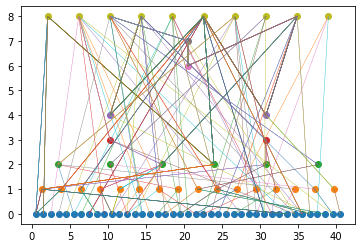

In [10]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [11]:
test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
test_y = digits.target[1617:]

In [12]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = test_y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = test_X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in test_X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in test_y[digits_indexes].reshape(samplesize,1).tolist()]

In [13]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)


px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
# the index of maximum in each line
test_pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
for i in range(number_of_classification):
    index = number_of_classification - i - 1
    test_pred_outputs[test_pred_outputs==index] = numbers[index]

test_real_outputs = np.array(test_x_outputs).reshape(samplesize,)

In [14]:
test_real_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [15]:
test_pred_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 5, 2, 2, 3, 2, 5,
       3, 3, 3, 3, 2, 4, 4, 4, 2, 2, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 4, 2, 2, 2, 2, 0, 0, 0, 3, 3, 2, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       3, 2, 2, 2, 0, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 0, 2, 7, 2, 7, 7, 0,
       7, 7, 7, 5, 7, 7, 7, 0, 7, 7, 7, 7, 0, 2, 3, 4, 2, 2, 4, 3, 2, 2,
       2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3], dtype=int64)

In [16]:
np.sum(test_pred_outputs == test_real_outputs)/samplesize

0.39444444444444443

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_pred_outputs, test_real_outputs)
print(cm)

[[15  0  0  0  0  7  4  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0 18 17  5  3  5 11  2 11  3]
 [ 0  0  0 11  2  5  3  0  4 15]
 [ 1  1  0  0 15  1  0  0  2  0]
 [ 0  0  0  2  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]


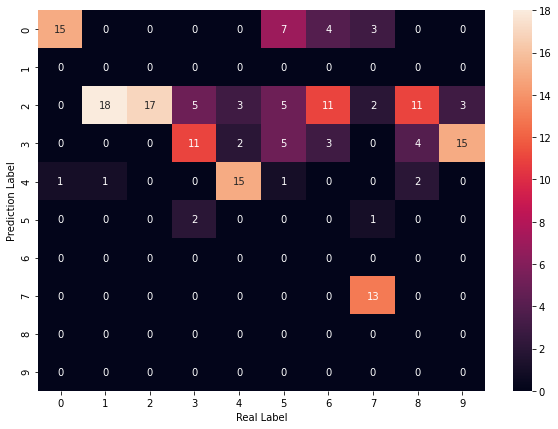

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [21]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [41, 16, 6, 2, 2, 0, 1, 1, 10]


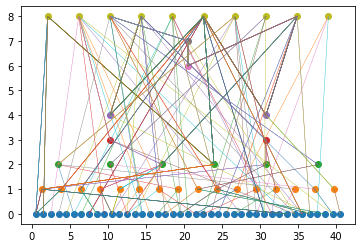

In [22]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [23]:
stats

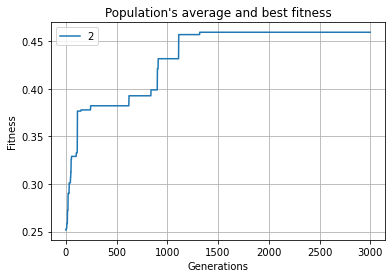

In [24]:

statistics = stats

generation = range(len(statistics.most_fit_genomes))
best_fitness = [c.fitness for c in statistics.most_fit_genomes]
avg_fitness = np.array(statistics.get_fitness_mean())
stdev_fitness = np.array(statistics.get_fitness_stdev())



#plt.plot(generation, avg_fitness, "b-", label="average")
#plt.plot(generation, avg_fitness - stdev_fitness, "g-.", label="-1 sd")
#plt.plot(generation, avg_fitness + stdev_fitness, "g-.", label="+1 sd")

plt.plot(generation, best_fitness, label=i)

plt.title("Population's average and best fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.grid()
plt.legend(loc="best")
plt.show()

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(10)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []


used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)


# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1
list_nodes_number.append(np.sum(length_of_each_layer))
list_connection_number.append(len(all_path_side2side))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))


length of each layers: [41, 16, 6, 2, 2, 0, 1, 1, 10]
Total nodes:79 Total connections::320
